In [ ]:
# !conda install -c conda-forge osmnx 
# !conda install -c conda-forge shapely

In [5]:
import osmnx as ox
import time
from shapely.geometry import Polygon
import os

def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
    # We need an unique ID for each edge
    gdf_edges["fid"] = gdf_edges.index
    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)

osmnx version 0.16.2


In [6]:
ox.utils.config(
    use_cache=True,
    cache_folder='../../cache', 
    data_folder='../../data',
    imgs_folder='../../results'
)

### Download network in a boundingbox

In [3]:
if False: # disabled
    bounds = (18.029122582902115, 18.070836297501724, 59.33476653724975, 59.352622230576124)
    x1,x2,y1,y2 = bounds
    boundary_polygon = Polygon([(x1,y1),(x2,y1),(x2,y2),(x1,y2)])
    G = ox.graph_from_polygon(boundary_polygon, network_type='drive')
    start_time = time.time()
    save_graph_shapefile_directional(G, filepath='../../data/stockholm')
    print("--- %s seconds ---" % (time.time() - start_time))

--- 0.4474039077758789 seconds ---


### Download network in a city

In [4]:
place ="Porto"
G = ox.graph_from_place(place, network_type='drive', which_result=2)
# save_graph_shapefile_directional(G, filepath='../../data/porto')

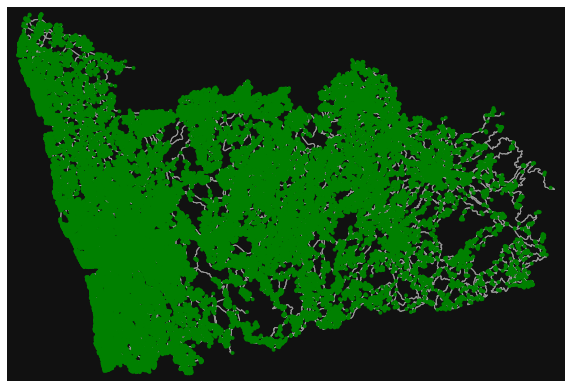

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(G, figsize=(10, 10), bgcolor='#111111', node_color='g')

### Download network with a boundary

+ https://peteris.rocks/blog/openstreetmap-administrative-boundaries-in-geojson/
+ http://polygons.openstreetmap.fr/?id=3372453

In [ ]:
# Download by a boundary polygon in geojson
import osmnx as ox
from shapely.geometry import shape
porto_city = "../../data/porto_city"
porto = "../../data/porto"
location = porto
json_file = open(location+"_boundary.geojson")
import json
data = json.load(json_file)
# boundary_polygon = shape(data["features"][0]['geometry'])
boundary_polygon = shape(data["geometries"][0])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive') #drive
ox.io.save_graphml(G,filepath=location+'.graphml')
#save_graph_shapefile_directional(G, filepath='../../data/porto_city')

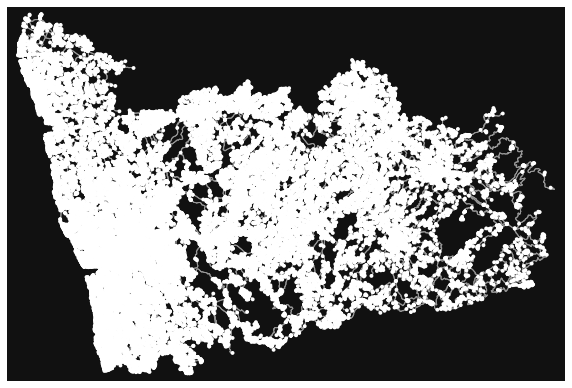

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [8]:
ox.plot_graph(G, figsize=(10, 10))

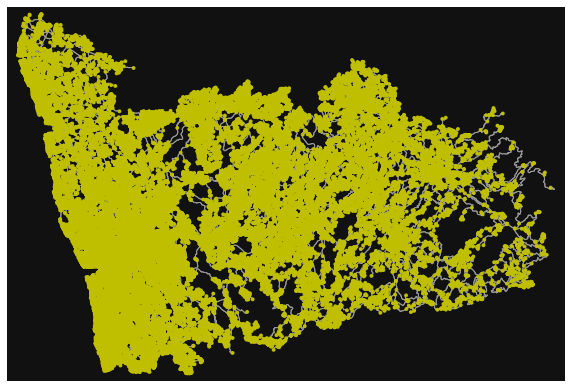

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [7]:
G = ox.io.load_graphml(filepath=location+'.graphml')
ox.plot_graph(G, figsize=(10, 10), bgcolor='#111111', node_color='y')

In [14]:
graph_proj = ox.projection.project_graph(G)

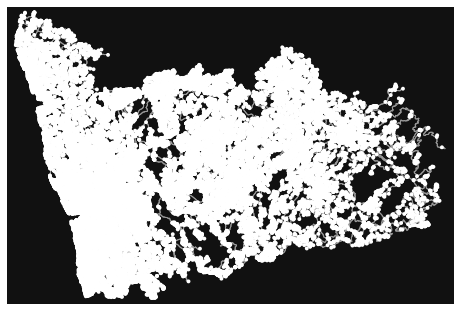

In [15]:
fig, ax = ox.plot_graph(graph_proj)

In [17]:
stats = ox.basic_stats(graph_proj)

In [18]:
stats

{'n': 72797,
 'm': 173861,
 'k_avg': 4.7765979367281615,
 'intersection_count': 59305,
 'streets_per_node_avg': 2.696484745250491,
 'streets_per_node_counts': {0: 0,
  1: 13492,
  2: 396,
  3: 53923,
  4: 4755,
  5: 163,
  6: 68},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.18533730785609298,
  2: 0.00543978460650851,
  3: 0.7407310740827232,
  4: 0.06531862576754537,
  5: 0.002239103259749715,
  6: 0.0009341044273802492},
 'edge_length_total': 23668691.21599985,
 'edge_length_avg': 136.13571310414554,
 'street_length_total': 12966459.257000038,
 'street_length_avg': 132.12340921550086,
 'street_segments_count': 98139,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.95941653810381e-05,
 'self_loop_proportion': 0.003750122224075555,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}